In [1]:
!pip install mlrose-hiive

     |████████████████████████████████| 51kB 3.9MB/s 
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.2.4-cp37-none-any.whl size=98351 sha256=6fd557dbf28547a20b087a6d3a77ba8fe7528b477c723218dd045eb2e515fcfa
  Stored in directory: /root/.cache/pip/wheels/7c/42/31/77944bb5cb941be07e4a96e0c112ae32c8d27017c5f31459de
Successfully built mlrose-hiive


In [2]:
from sklearn import tree
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
import mlrose_hiive as ml
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [3]:
data = pd.read_csv("winequality-white.csv",sep=";")
y = data.iloc[:,11].to_numpy()


x = data.iloc[:,:11].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=7/10, random_state=42)
scaler = StandardScaler()
scaler.fit(x_train)  
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test) 

y_train = np.where(y_train>=7,1,0)
y_test = np.where(y_test>=7,1,0)


Back Prop

In [4]:
nn_model1 = ml.NeuralNetwork(hidden_nodes = [9], activation = 'relu', algorithm = 'gradient_descent', max_iters = 5000, bias = True, \
                                 is_classifier = True, learning_rate = 0.001, early_stopping = False, clip_max = 5,\
                                 max_attempts = 100, random_state = 1,curve=True)

%time nn_model1.fit(x_train, y_train)
print(nn_model1.fitness_curve)

CPU times: user 26.6 s, sys: 21.6 s, total: 48.2 s
Wall time: 24.4 s
[-1.5909118  -0.96132459 -0.52192066 ... -0.31062754 -0.31039944
 -0.31084421]


In [5]:
y_train_pred = nn_model1.predict(x_train)

y_train_accuracy = metrics.accuracy_score(y_train, y_train_pred)

print(y_train_accuracy)
0.45

# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(x_test)

y_test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print(y_test_accuracy)

0.8441116405718175
0.8083989501312336


RHC

In [23]:
nn_model1 = ml.NeuralNetwork(hidden_nodes = [9], activation = 'relu', algorithm = 'random_hill_climb', max_iters = 5000, bias = True, \
                                 is_classifier = True, learning_rate = 0.001, early_stopping = False, clip_max = 5,\
                                 max_attempts = 100, random_state = 1,curve=True,restarts = 50)

%time nn_model1.fit(x_train, y_train)

CPU times: user 28min 46s, sys: 23min 20s, total: 52min 6s
Wall time: 26min 22s


NeuralNetwork(activation='relu', algorithm='random_hill_climb', bias=True,
              clip_max=5, curve=True, early_stopping=False, hidden_nodes=[9],
              is_classifier=True, learning_rate=0.001, max_attempts=100,
              max_iters=5000, mutation_prob=0.1, pop_size=200, random_state=1,
              restarts=100,
              schedule=GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))

In [24]:
y_train_pred = nn_model1.predict(x_train)

y_train_accuracy = metrics.accuracy_score(y_train, y_train_pred)

print(y_train_accuracy)
0.45

# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(x_test)

y_test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print(y_test_accuracy)

0.404356705241661
0.4152814231554389


[[1.59077833e+00 7.49522000e+05]
 [1.59077833e+00 7.49523000e+05]
 [1.59074979e+00 7.49525000e+05]
 ...
 [1.40030751e+00 7.56973000e+05]
 [1.40030751e+00 7.56974000e+05]
 [1.40006119e+00 7.56976000e+05]]


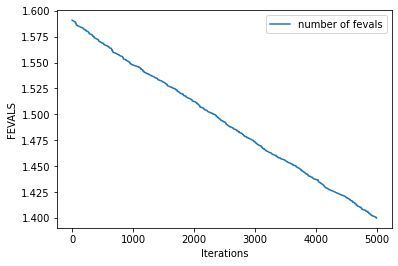

In [26]:
print(nn_model1.fitness_curve)

plt.plot(nn_model1.fitness_curve[:,0],label='number of fevals')
#plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
plt.ylabel('FEVALS')
plt.xlabel("Iterations")
plt.legend()

SA

In [19]:
nn_model2 = ml.NeuralNetwork(hidden_nodes = [9], activation = 'relu', algorithm = 'simulated_annealing', max_iters = 50000, bias = True, \
                                 is_classifier = True, learning_rate = 0.01, early_stopping = False,\
                                 max_attempts = 10000, random_state = 1,curve=True)

%time nn_model2.fit(x_train, y_train)

CPU times: user 3min 40s, sys: 2min 59s, total: 6min 40s
Wall time: 3min 22s


NeuralNetwork(activation='relu', algorithm='simulated_annealing', bias=True,
              clip_max=10000000000.0, curve=True, early_stopping=False,
              hidden_nodes=[9], is_classifier=True, learning_rate=0.01,
              max_attempts=10000, max_iters=50000, mutation_prob=0.1,
              pop_size=200, random_state=1, restarts=0,
              schedule=GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))

In [20]:
y_train_pred = nn_model2.predict(x_train)

y_train_accuracy = metrics.accuracy_score(y_train, y_train_pred)

print(y_train_accuracy)
0.45

# Predict labels for test set and assess accuracy
y_test_pred = nn_model2.predict(x_test)

y_test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print(y_test_accuracy)

0.8236895847515316
0.7932341790609507


[[1.59122280e+00 3.00000000e+00]
 [1.59154928e+00 5.00000000e+00]
 [1.59281186e+00 7.00000000e+00]
 ...
 [4.03235324e-01 9.75070000e+04]
 [4.03221108e-01 9.75090000e+04]
 [4.03186395e-01 9.75110000e+04]]


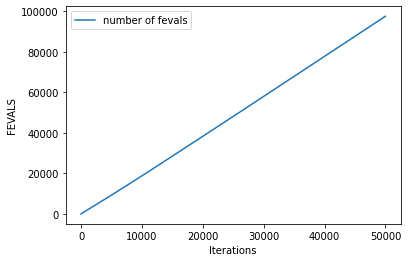

In [22]:
plt.plot(nn_model2.fitness_curve[:,1],label='number of fevals')
#plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
plt.ylabel('FEVALS')
plt.xlabel("Iterations")
plt.legend()
print(nn_model2.fitness_curve)

GA

In [15]:
nn_model3 = ml.NeuralNetwork(hidden_nodes = [9], activation = 'relu', algorithm = 'genetic_alg', max_iters = 5000, bias = True, \
                                 is_classifier = True, learning_rate = 0.01, early_stopping = False, clip_max = 5,\
                                 max_attempts = 100, random_state = 1,curve=True)

%time nn_model3.fit(x_train, y_train)

CPU times: user 40min 17s, sys: 32min 38s, total: 1h 12min 56s
Wall time: 36min 55s


NeuralNetwork(activation='relu', algorithm='genetic_alg', bias=True, clip_max=5,
              curve=True, early_stopping=False, hidden_nodes=[9],
              is_classifier=True, learning_rate=0.01, max_attempts=100,
              max_iters=5000, mutation_prob=0.1, pop_size=200, random_state=1,
              restarts=0,
              schedule=GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))

In [16]:
print(nn_model3.fitness_curve)
y_train_pred = nn_model3.predict(x_train)

y_train_accuracy = metrics.accuracy_score(y_train, y_train_pred)

print(y_train_accuracy)
0.45

# Predict labels for test set and assess accuracy
y_test_pred = nn_model3.predict(x_test)

y_test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print(y_test_accuracy)

[[3.90418684e+00 4.03000000e+02]
 [3.38020777e+00 6.05000000e+02]
 [3.38020777e+00 8.06000000e+02]
 ...
 [3.64969839e-01 1.00486000e+06]
 [3.64969839e-01 1.00506100e+06]
 [3.64969839e-01 1.00526200e+06]]
0.820285908781484
0.7993584135316418
